# <font color='#54595F'><div style = 'background-color:FAFAFA'><center>Obtaining and analyzing cryptocurrencies with the CoinMarketCap API</center> </div></font>

## <font color='#54595F'>Introduction</font>
<font color='#54595F'>In the following Jupyter Notebook I will use the CoinmarketCap API to obtain information about cryptocurrencies and then perform an analysis of them. All the data was obtained around 15:08hs GMT on the 19th of November 2022.</font>
    
---

#### <div class="alert alert-danger"> Disclaimer: This Jupyter Notebook's content is intended solely for informational and recreational purposes. Financial advice is not provided here. </div>



In [1]:
import pandas as pd
from requests import Request, Session
import json
import time
import webbrowser
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get data from Coinmarketcap API
def get_crypto_data(number_of_cyptos, key):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # Coinmarketcap API url

    parameters = {'limit':number_of_cyptos} # API parameters to pass to obtain 1000 cryptos according to market cap

    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': key # API Key (use your own I'll erase mine)
    } 

    session = Session()
    session.headers.update(headers)

    response = session.get(url, params=parameters)

    info = json.loads(response.text) # Save the json file in the info variable
    return info

In [3]:
data = get_crypto_data('1000', 'XXXXXXX')

In [4]:
# convert the JSON to a data frame that you can work with.
def convert_json(df):    
    a = df['data']
    df2 = pd.DataFrame.from_dict(a)
    del df2['tags']
    del df2['platform']
    

    usd = []
    for i in df2['quote']:
        usd.append(i['USD'])

    usd_data = pd.DataFrame(usd)

    cryptos = pd.merge(df2, usd_data, left_index=True, right_index=True)
    
    return cryptos

In [5]:
df = convert_json(data)

In [6]:
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl,last_updated_y
0,1,Bitcoin,BTC,bitcoin,9849,2013-04-28T00:00:00.000Z,21000000.0,1.921156e+07,1.921156e+07,1,...,-0.094292,-1.348878,-13.748964,-12.695194,-22.270135,3.198937e+11,38.5054,3.496731e+11,NaN,2022-11-19T15:05:00.000Z
1,1027,Ethereum,ETH,ethereum,6205,2015-08-07T00:00:00.000Z,NaN,1.223739e+08,1.223739e+08,2,...,-0.305859,-5.108943,-7.464164,-11.061300,-25.320426,1.478181e+11,17.7937,1.478181e+11,NaN,2022-11-19T15:05:00.000Z
2,825,Tether,USDT,tether,42432,2015-02-25T00:00:00.000Z,NaN,6.594494e+10,7.314177e+10,3,...,-0.013168,0.056658,-0.087686,-0.090456,-0.080774,6.589017e+10,7.9306,7.308102e+10,NaN,2022-11-19T15:05:00.000Z
3,3408,USD Coin,USDC,usd-coin,7049,2018-10-08T00:00:00.000Z,NaN,4.438991e+10,4.438991e+10,4,...,0.009863,-0.023986,0.017586,0.009690,0.012759,4.439972e+10,5.3451,4.439972e+10,NaN,2022-11-19T15:05:00.000Z
4,1839,BNB,BNB,bnb,1140,2017-07-25T00:00:00.000Z,200000000.0,1.599732e+08,1.599800e+08,5,...,-0.413218,-3.974280,-0.832836,0.538245,-9.391511,4.328791e+10,5.2105,5.411893e+10,NaN,2022-11-19T15:05:00.000Z


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1000 non-null   int64  
 1   name                              1000 non-null   object 
 2   symbol                            1000 non-null   object 
 3   slug                              1000 non-null   object 
 4   num_market_pairs                  1000 non-null   int64  
 5   date_added                        1000 non-null   object 
 6   max_supply                        672 non-null    float64
 7   circulating_supply                1000 non-null   float64
 8   total_supply                      1000 non-null   float64
 9   cmc_rank                          1000 non-null   int64  
 10  self_reported_circulating_supply  328 non-null    float64
 11  self_reported_market_cap          328 non-null    float64
 12  tvl_rat

In [8]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'max_supply', 'circulating_supply', 'total_supply', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated_x', 'quote', 'price', 'volume_24h',
       'volume_change_24h', 'percent_change_1h', 'percent_change_24h',
       'percent_change_7d', 'percent_change_30d', 'percent_change_60d',
       'percent_change_90d', 'market_cap', 'market_cap_dominance',
       'fully_diluted_market_cap', 'tvl', 'last_updated_y'],
      dtype='object')

In [9]:
# Get a dataframe and a plot of n top cryptos. Logy True if you want a logaritmic comparison, False for %
def market_cap_n_plot(n, df, title, logy):
    
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10,5)

    market_cap_df = df[['name', 'market_cap']]
    market_cap_top20 = market_cap_df.head(n).set_index('name')
    market_cap_top20 = market_cap_top20.assign(market_cap_percentage = lambda i:(i.market_cap / market_cap_df.market_cap.sum())*100)
    print(market_cap_top20)

    ax = market_cap_top20.market_cap_percentage.plot.bar(title=title, logy=logy)
    ax.set_ylabel('')
    ax.set_xlabel('Crypto Name')     

                   market_cap  market_cap_percentage
name                                                
Bitcoin          3.198937e+11              37.073770
Ethereum         1.478181e+11              17.131240
Tether           6.589017e+10               7.636278
USD Coin         4.439972e+10               5.145663
BNB              4.328791e+10               5.016811
Binance USD      2.288992e+10               2.652806
XRP              1.908767e+10               2.212147
Cardano          1.115478e+10               1.292772
Dogecoin         1.115454e+10               1.292744
Polygon          7.497207e+09               0.868882
Polkadot         6.318658e+09               0.732295
Dai              5.896143e+09               0.683328
Shiba Inu        4.997159e+09               0.579141
TRON             4.793455e+09               0.555533
Solana           4.589956e+09               0.531949
Litecoin         4.551211e+09               0.527458
Uniswap          4.436096e+09               0.

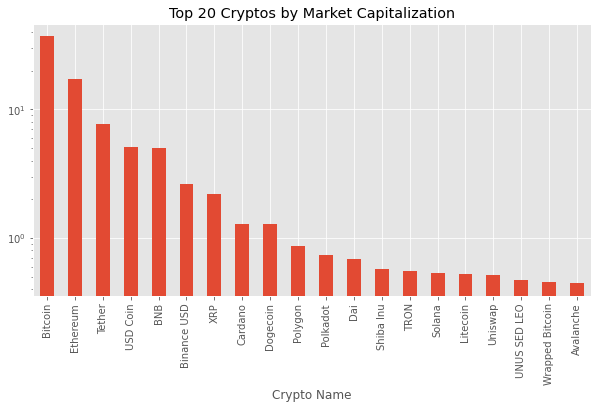

In [10]:
market_cap_n_plot(20, df, 'Top 20 Cryptos by Market Capitalization', True)

In [11]:
# I will work with the following columns:
# 'name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d'

volatility = df[:50][['name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d', 'percent_change_90d']] 
volatility = volatility.set_index('name')

volatility24hs = volatility.sort_values('percent_change_24h', ascending=False)
volatility7d = volatility.sort_values('percent_change_7d', ascending=False)
volatility30d = volatility.sort_values('percent_change_30d', ascending=False)
volatility60d = volatility.sort_values('percent_change_60d', ascending=False)
volatility90d = volatility.sort_values('percent_change_90d', ascending=False)    

In [12]:
# Plot Volatilities
def top15_plot(n, volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax = volatility_series[:n].plot.bar(color='green', ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel('% Change')
    ax = volatility_series[-n:].plot.bar(color='red', ax=axes[1])
    return fig, ax

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

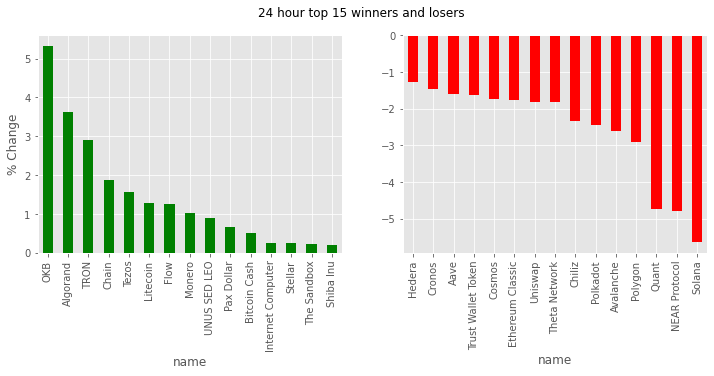

In [13]:
top15_plot(15, volatility24hs.percent_change_24h, '24 hour top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

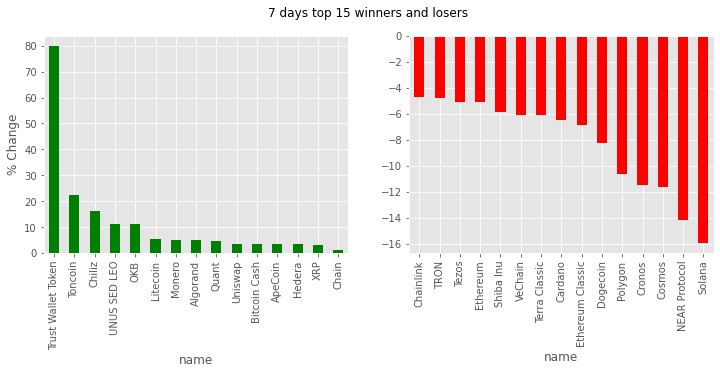

In [14]:
top15_plot(15, volatility7d.percent_change_7d, '7 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

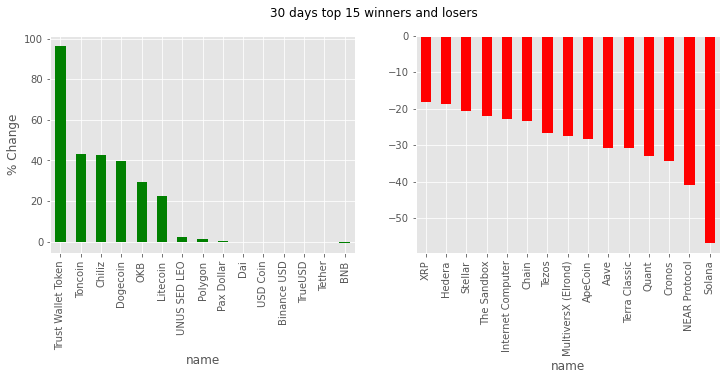

In [15]:
top15_plot(15, volatility30d.percent_change_30d, '30 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

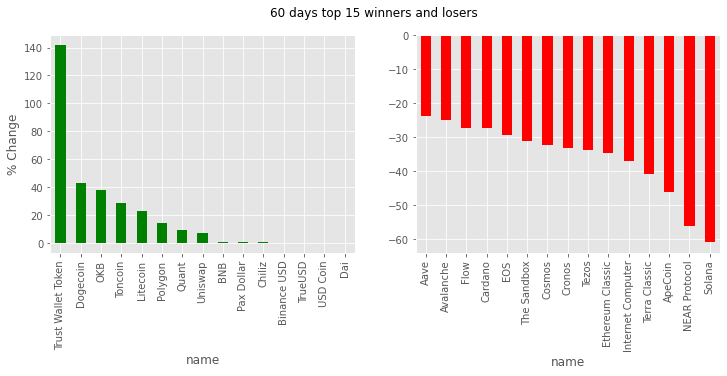

In [16]:
top15_plot(15, volatility60d.percent_change_60d, '60 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

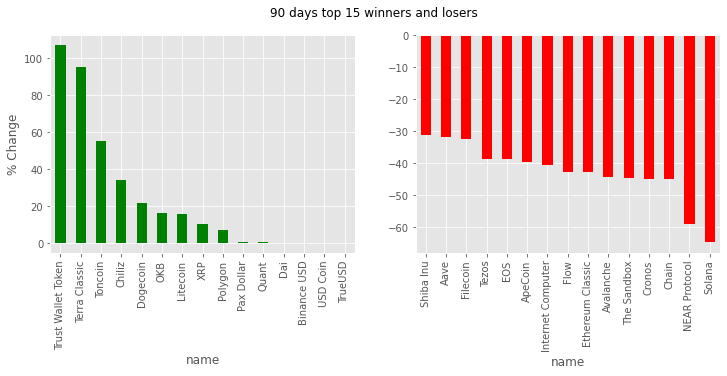

In [17]:
top15_plot(15, volatility90d.percent_change_90d, '90 days top 15 winners and losers')

In [18]:
# get statistics df
def get_statistics(data):
   return data[['price','volume_24h', 'percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d', 'market_cap']].describe()

In [19]:
# Lets get the statistics of top 100 cryptos
get_statistics(df[:99])

,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
count,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,3.859220e+02,6.553279e+08,-0.197547,-0.551621,-12.661579,-14.609971,-20.028957,8.154546e+09
std,2.353765e+03,3.271690e+09,2.030430,10.415646,21.066384,24.463788,28.545947,3.604117e+10
min,6.676068e-07,7.489323e+05,-6.082916,-16.681510,-56.797826,-60.874110,-92.616783,2.797082e+08
25%,2.962103e-01,1.069480e+07,-1.214973,-4.861832,-24.946708,-29.451643,-39.085182,4.099028e+08
50%,1.012447e+00,2.587217e+07,-0.182819,-1.347041,-15.763202,-15.426414,-24.121541,8.141369e+08
75%,8.519731e+00,1.090242e+08,0.849063,1.830004,-3.062203,-0.937446,-3.248710,2.248700e+09
max,1.665110e+04,2.612494e+10,5.333132,79.839159,96.452007,141.645797,106.900772,3.198937e+11


In [20]:
#plot statistics
def plot_statistics(data, title):
    sns.set(style='ticks')
    facecolor = '#fafafa'
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)
    ax = sns.boxplot(data=data[['percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d']], 
                     linewidth=1, 
                     fliersize=1, 
                     flierprops=dict(marker='x', markersize=4))

    title = title
    fig.suptitle(title, fontsize=12)
    return ax, fig

(<AxesSubplot:>, <Figure size 720x432 with 1 Axes>)

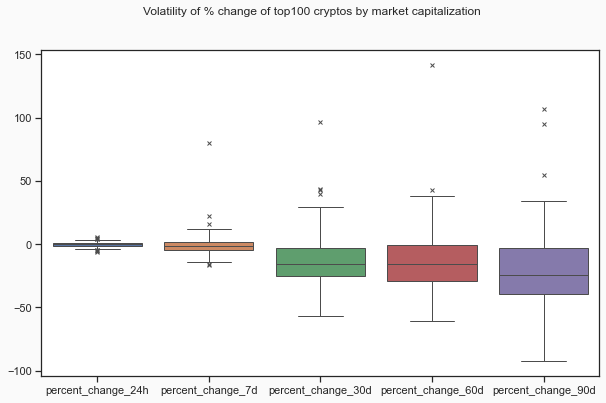

In [21]:
# Lets get the statistics of top 100 cryptos
plot_statistics(df[:99], 'Volatility of % change of top100 cryptos by market capitalization')

In [22]:
# get symbol name and percentage of max crypto % change and min crypto % change
def get_max_min_crypto_change(data):
    df =data[['name','symbol', 'percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d']]
    print('\033[1m'+'24hs max'+'\033[0m')
    print(df[['symbol','name','percent_change_24h']].loc[df['percent_change_24h'].idxmax()])
    print("")
    print('\033[1m'+'7 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_7d']].loc[df['percent_change_7d'].idxmax()])
    print("")
    print('\033[1m'+'30 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_30d']].loc[df['percent_change_30d'].idxmax()])
    print("")
    print('\033[1m'+'60 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_60d']].loc[df['percent_change_60d'].idxmax()])
    print("")
    print('\033[1m'+'90 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_90d']].loc[df['percent_change_90d'].idxmax()])
    print("")
    print('\033[1m'+'24hs min'+'\033[0m')
    print(df[['symbol','name','percent_change_24h']].loc[df['percent_change_24h'].idxmin()])
    print("")
    print('\033[1m'+'7 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_7d']].loc[df['percent_change_7d'].idxmin()])
    print("")
    print('\033[1m'+'30 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_30d']].loc[df['percent_change_30d'].idxmin()])
    print("")
    print('\033[1m'+'60 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_60d']].loc[df['percent_change_60d'].idxmin()])
    print("")
    print('\033[1m'+'90 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_90d']].loc[df['percent_change_90d'].idxmin()])

In [23]:
get_max_min_crypto_change(df[:100])

24hs max
symbol                     OKB
name                       OKB
percent_change_24h    5.333132
Name: 35, dtype: object

7 days max
symbol                              TWT
name                 Trust Wallet Token
percent_change_7d             79.839159
Name: 44, dtype: object

30 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_30d             96.452007
Name: 44, dtype: object

60 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_60d            141.645797
Name: 44, dtype: object

90 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_90d            106.900772
Name: 44, dtype: object

24hs min
symbol                    KAVA
name                      Kava
percent_change_24h   -6.082916
Name: 95, dtype: object

7 days min
symbol                   CSPR
name                   Casper
percent_change_7d   -16.68151
Name: 93,

In [24]:
# Get stablecoins
def get_stablecoins(df, n):
    stablecoins = df[(df.price > 0.995) & (df.price < 1.005)]
    return stablecoins

In [25]:
stablecoins = get_stablecoins(df, 20)

In [26]:
stablecoins['name'].unique()

array(['Tether', 'USD Coin', 'Binance USD', 'Dai', 'Pax Dollar',
       'TrueUSD', 'Origin Dollar', 'sUSD', 'mStable USD',
       'Brazil National Football Team Fan Token', 'Reserve', 'USDK',
       'Poolz Finance'], dtype=object)

In [27]:
print(stablecoins.name)

2                                       Tether
3                                     USD Coin
5                                  Binance USD
11                                         Dai
43                                  Pax Dollar
48                                     TrueUSD
325                              Origin Dollar
335                                       sUSD
366                                mStable USD
429    Brazil National Football Team Fan Token
436                                    Reserve
437                                       USDK
943                              Poolz Finance
Name: name, dtype: object


                                           market_cap  market_cap_percentage
name                                                                        
Tether                                   6.589017e+10              46.692666
USD Coin                                 4.439972e+10              31.463591
Binance USD                              2.288992e+10              16.220805
Dai                                      5.896143e+09               4.178266
Pax Dollar                               9.484475e+08               0.672112
TrueUSD                                  8.612045e+08               0.610287
Origin Dollar                            4.930418e+07               0.034939
sUSD                                     4.751987e+07               0.033675
mStable USD                              4.101202e+07               0.029063
Brazil National Football Team Fan Token  2.980883e+07               0.021124
Reserve                                  2.882382e+07               0.020426

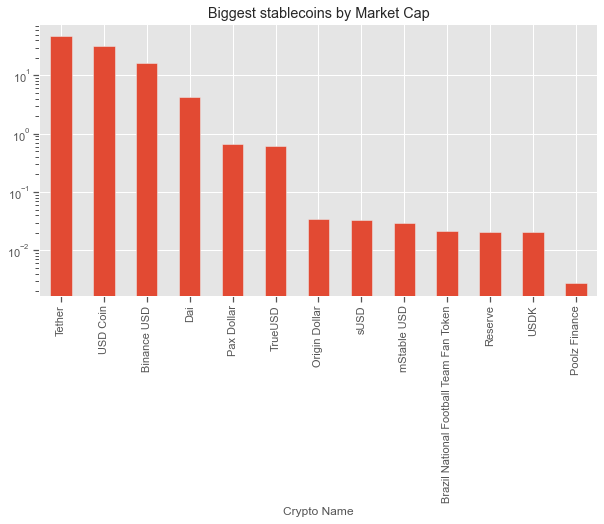

In [28]:
market_cap_n_plot(100, stablecoins, 'Biggest stablecoins by Market Cap', True)

In [29]:
get_statistics(stablecoins[:100])

,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
count,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,1.000640,2.487962e+09,-0.454537,1.840866,-1.954646,14.765818,16.335572,1.085497e+10
std,0.001996,7.194538e+09,1.779458,10.295485,6.958377,61.439677,68.488914,2.109782e+10
min,0.998200,0.000000e+00,-6.246261,-10.624943,-25.082725,-27.795753,-30.674044,3.840196e+06
25%,0.999069,2.250584e+05,-0.005843,-0.060911,-0.087686,-0.010581,-0.080774,2.980883e+07
50%,1.000221,7.904458e+06,0.009863,-0.014135,0.010019,0.077903,0.070556,4.930418e+07
75%,1.002449,1.952962e+08,0.079646,0.056658,0.160656,0.487542,0.161821,5.896143e+09
max,1.004653,2.612494e+10,0.671831,34.680804,0.395265,217.616525,242.521406,6.589017e+10


In [30]:
get_max_min_crypto_change(stablecoins[:4])

24hs max
symbol                     DAI
name                       Dai
percent_change_24h    0.079646
Name: 11, dtype: object

7 days max
symbol                   USDT
name                   Tether
percent_change_7d    0.056658
Name: 2, dtype: object

30 days max
symbol                     DAI
name                       Dai
percent_change_30d    0.035483
Name: 11, dtype: object

60 days max
symbol                       BUSD
name                  Binance USD
percent_change_60d       0.077903
Name: 5, dtype: object

90 days max
symbol                     DAI
name                       Dai
percent_change_90d    0.073506
Name: 11, dtype: object

24hs min
symbol                    USDT
name                    Tether
percent_change_24h   -0.013168
Name: 2, dtype: object

7 days min
symbol                    DAI
name                      Dai
percent_change_7d   -0.060911
Name: 11, dtype: object

30 days min
symbol                    USDT
name                    Tether
percent_change_30d   -0.